#Finding the formula for Popularity
##Popularity prediction using Mashable articles from 2013-2014
####Jorge Miranda
####General Assembly – Data Science DAT8 Oct 2015


###Introduction

The way we use the internet has transformed the landscape of online content consumption. The ease of producing media content online makes it more challenging to catch the audience’s attention, especially for news media outlets. In this scenario, there is an increased interest in identifying what kind of articles are going to be more popular.  For Mashable, a leading global media company, this is more than an interest, it is its business model. The company was created in 2005 and by 2009 it was one of the 25 best blogs according to Time. In early 2012 Mashable had 20 million followers and it was valued at $200 million (The Guardian, 2012). According to Forbes, in 2015 Mashable tops list of most influential media outlets.

There are several ways to measure popularity. Pageviews, user comments and number of shares in social media are the most common ways to measure popularity. In this paper, we address the problem of predicting the popularity of news articles based on shares in social media.



###Problem statement

Can the number of shares of a Mashable article be predicted based on number of words in title, number of words in content, number of images in article, number of videos, average keywords, and day of the week?
Hypothesis:
1.	Articles with captivating content (images and videos) attracts more attention and are share more often.

###Data Import

Data was obtained from the Center for Machine Learning and Intelligent Systems of University of California, Irvine. The data contains 39644 observations and 60 featured variables and 1 response variable. The observations are articles from Mashable from 2011 and 2012.


In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/jorge3ie/DAT8_Class/master/OnlineNewsPopularity.csv'
mashable = pd.read_csv(url)
mashable.shape
mashable.dtypes

###Data Pre-Processing

The variable names have a space in front of the variables. 12 variables were renamed.
The response variable was also renamed to "total".

In [ ]:
mashable.rename(columns={' n_tokens_title':'title'}, inplace=True)
mashable.rename(columns={' n_tokens_content':'content'}, inplace=True)
mashable.rename(columns={' num_imgs':'num_imgs'}, inplace=True)
mashable.rename(columns={' num_videos':'num_videos'}, inplace=True)
mashable.rename(columns={' kw_avg_avg':'kw_avg_avg'}, inplace=True)
mashable.rename(columns={' weekday_is_monday':'monday'}, inplace=True)
mashable.rename(columns={' weekday_is_tuesday':'tuesday'}, inplace=True)
mashable.rename(columns={' weekday_is_wednesday':'wednesday'}, inplace=True)
mashable.rename(columns={' weekday_is_thursday':'thursday'}, inplace=True)
mashable.rename(columns={' weekday_is_friday':'friday'}, inplace=True)
mashable.rename(columns={' weekday_is_saturday':'saturday'}, inplace=True)
mashable.rename(columns={' weekday_is_sunday':'sunday'}, inplace=True)
mashable.rename(columns={' num_keywords':'num_keywords'}, inplace=True)

In [ ]:
mashable.columns

###Variable description (Dictionary)
* n_tokens_title: Number of words in the title 
* n_tokens_content: Number of words in the content 
* num_imgs: Number of images 
* num_videos: Number of videos 
* kw_avg_avg: Avg. keyword (avg. shares)
* weekday_is_monday: The article published on a Monday
* weekday_is_tuesday: The article published on a Tuesday 
* weekday_is_wednesday: The article published on a Wednesday 
* weekday_is_thursday: The article published on a Thursday
* weekday_is_friday: The article published on a Friday
* weekday_is_saturday: The article published on a Saturday 
* weekday_is_sunday: The article published on a Sunday 


In [48]:
feature_cols = ['n_tokens_title', 'n_tokens_content', 'num_keywords', 'num_imgs', 'num_videos', 'kw_avg_avg', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday']

X = mashable[feature_cols]
y = mashable.total

In [50]:
X.dtypes

n_tokens_title          float64
n_tokens_content        float64
num_imgs                float64
num_videos              float64
kw_avg_avg              float64
weekday_is_monday       float64
weekday_is_tuesday      float64
weekday_is_wednesday    float64
weekday_is_thursday     float64
weekday_is_friday       float64
weekday_is_saturday     float64
dtype: object

###Feature Selection

Using matplotlib and seaborn, it is possible to get a scatter plot and a heat map (response vs. each feature) to determine what features appear to be correlated strongly with the response:

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

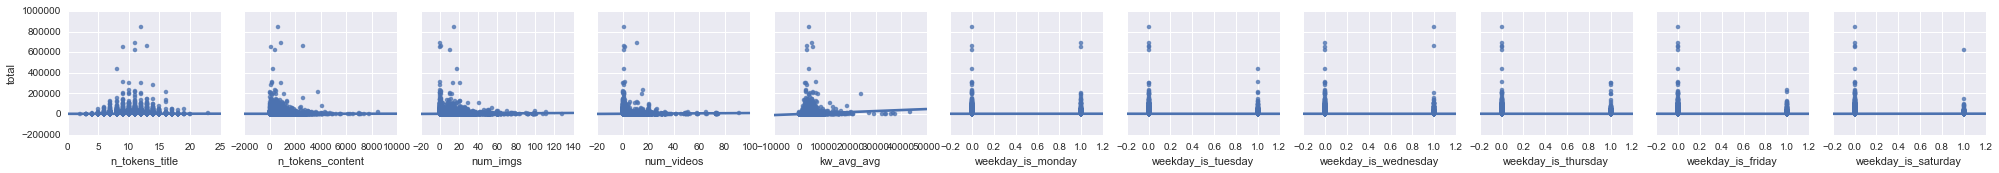

In [58]:
sns.pairplot(mashable, x_vars=feature_cols, y_vars='total', kind='reg')

In [69]:
test = ['n_tokens_title', 'n_tokens_content', 'num_imgs', 'num_videos', 'kw_avg_avg', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'total']


In [72]:
Xy=mashable[test]


In [73]:
Xy.corr()

,n_tokens_title,n_tokens_content,num_imgs,num_videos,kw_avg_avg,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,total
n_tokens_title,1.000000,0.018160,-0.008858,0.051460,0.004296,0.004274,0.009322,0.008935,-0.015472,-0.002015,-0.015013,0.008783
n_tokens_content,0.018160,1.000000,0.342600,0.103699,-0.079624,-0.002484,-0.004027,-0.016891,-0.007395,-0.015949,0.034538,0.002459
num_imgs,-0.008858,0.342600,1.000000,-0.067336,0.145236,-0.005249,-0.003767,-0.024674,-0.005824,-0.007537,0.028970,0.039388
num_videos,0.051460,0.103699,-0.067336,1.000000,0.106815,0.009453,0.006740,-0.001397,-0.003663,0.003473,-0.007135,0.023936
kw_avg_avg,0.004296,-0.079624,0.145236,0.106815,1.000000,-0.020546,-0.003915,-0.014054,-0.004056,0.003330,0.031116,0.110413
weekday_is_monday,0.004274,-0.002484,-0.005249,0.009453,-0.020546,1.000000,-0.215107,-0.215912,-0.212904,-0.184173,-0.115413,0.009726
weekday_is_tuesday,0.009322,-0.004027,-0.003767,0.006740,-0.003915,-0.215107,1.000000,-0.229976,-0.226772,-0.196169,-0.122931,-0.007941
weekday_is_wednesday,0.008935,-0.016891,-0.024674,-0.001397,-0.014054,-0.215912,-0.229976,1.000000,-0.227620,-0.196903,-0.123390,-0.003801
weekday_is_thursday,-0.015472,-0.007395,-0.005824,-0.003663,-0.004056,-0.212904,-0.226772,-0.227620,1.000000,-0.194160,-0.121672,-0.008833
weekday_is_friday,-0.002015,-0.015949,-0.007537,0.003473,0.003330,-0.184173,-0.196169,-0.196903,-0.194160,1.000000,-0.105252,-0.003884


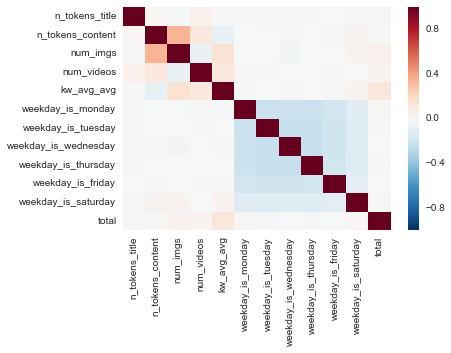

In [74]:
sns.heatmap(Xy.corr())

###Cross Validation / Logistic Regression

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])


In [ ]:
y_pred_class = logreg.predict(X_test)


In [ ]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.943250912039

In [ ]:
 y_test.value_counts().head(1) / len(y_test)

In [ ]:
print metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
 from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
logreg = LogisticRegression(C=1e9)
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

##Next Steps
I would like to get the right values for shares by scraping Mashable. Once I get those values I'd like to try other classification models such as kNN and random forest.